In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
from matplotlib.colors import LogNorm,Normalize
import seaborn as sns
from matplotlib import rc
import scipy.interpolate as interp
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
def get_density(vals, bins=30, kind="linear"):
    y, bin_edges = np.histogram(vals, bins=bins, density=True)
    x = (bin_edges[1:] + bin_edges[:-1])/2.
    f = interp.interp1d(x, y, kind=kind, fill_value="extrapolate")
    return f(vals)

In [2]:
bin_fle = pd.read_csv('tzpz_bin_data_WFIRST.csv',sep=' ')

In [3]:
bins = np.linspace(0,1.2,13)
label = np.linspace(0.05,1.15,12)

In [4]:
bin_fle

,Bin,N_G,z_true_mean_G,z_phot_mean_G,N_R,z_true_mean_R,z_phot_mean_R,fout,COR_Outlier_Bias
0,0.05,1304,0.079959,0.087680,2,0.574050,0.086550,0.001534,0.448668
1,0.15,2475,0.159723,0.164787,53,0.549951,0.170272,0.021414,0.324437
2,0.25,9714,0.251056,0.264840,631,0.487984,0.252856,0.064958,0.187674
3,0.35,9161,0.346519,0.361497,640,0.471255,0.346094,0.069861,0.092981
4,0.45,15313,0.452954,0.448169,790,0.380915,0.460194,0.051590,-0.054293
5,0.55,16024,0.554583,0.542307,478,0.415896,0.540469,0.029830,-0.080867
6,0.65,17269,0.645306,0.642620,149,0.603627,0.645330,0.008628,-0.025346
7,0.75,14581,0.754370,0.756054,180,0.706768,0.755806,0.012345,-0.027929
8,0.85,12743,0.844598,0.838298,191,0.746479,0.852929,0.014989,-0.057450
9,0.95,13555,0.954417,0.952653,119,0.866720,0.946655,0.008779,-0.041062


In [10]:
test2 = bin_fle
test2 = test2.drop(['N_G','z_true_mean_G','z_phot_mean_G','N_R','z_true_mean_R','z_phot_mean_R'],axis=1)
test2.columns=['z_true','F','outlier_bias']
test2.to_csv('Catastrophic_tzpz_WFIRST.csv',sep=' ',index=False)

In [8]:
test2

,z_true,F,outlier_bias
0,0.05,0.001534,0.448668
1,0.15,0.021414,0.324437
2,0.25,0.064958,0.187674
3,0.35,0.069861,0.092981
4,0.45,0.051590,-0.054293
5,0.55,0.029830,-0.080867
6,0.65,0.008628,-0.025346
7,0.75,0.012345,-0.027929
8,0.85,0.014989,-0.057450
9,0.95,0.008779,-0.041062


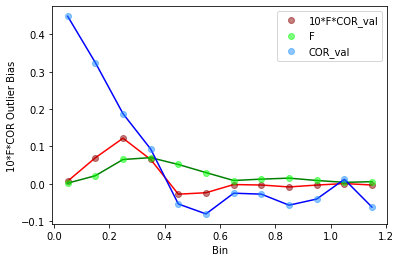

In [9]:
plt.plot(bin_fle.Bin,10*bin_fle.fout*bin_fle.COR_Outlier_Bias,c='red',)
plt.plot(bin_fle.Bin,10*bin_fle.fout*bin_fle.COR_Outlier_Bias,'o',c='darkred',alpha=0.5,label='10*F*COR_val')
plt.plot(bin_fle.Bin,bin_fle.fout,c='g')
plt.plot(bin_fle.Bin,bin_fle.fout,'o',alpha=0.5,label='F',c='lime')
plt.plot(bin_fle.Bin,bin_fle.COR_Outlier_Bias,c='blue')
plt.plot(bin_fle.Bin,bin_fle.COR_Outlier_Bias,'o',c='dodgerblue',alpha=0.5,label='COR_val')
plt.xlabel('Bin')
plt.ylabel('10*F*COR Outlier Bias')
plt.legend()

# 24 Bins

In [11]:
bins  = np.linspace(0,1.2,25)
start = (bins[0] + bins[1])/2.; end = (bins[-1] + bins[-2])/2.
print(start,end)
label = np.linspace(start,end,24)

0.024999999999999998 1.1749999999999998


In [12]:
print(bins)
print(label)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2 ]
[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175]


In [13]:
bin_fle = pd.read_csv('tzpz_bin_data_WFIRST_24.csv',sep=' ')

In [14]:
test2 = bin_fle
test2 = test2.drop(['N_G','z_true_mean_G','z_phot_mean_G','N_R','z_true_mean_R','z_phot_mean_R'],axis=1)
test2.columns=['z_true','F','outlier_bias']
test2.to_csv('Catastrophic_tzpz_WFIRST_24.csv',sep=' ',index=False)

In [15]:
test2

,z_true,F,outlier_bias
0,0.025,0.000000,0.000000
1,0.075,0.001626,0.448668
2,0.125,0.009375,0.583359
3,0.175,0.029043,0.273405
4,0.225,0.059952,0.228330
5,0.275,0.068109,0.166089
6,0.325,0.069546,0.111855
7,0.375,0.070248,0.070932
8,0.425,0.037905,-0.025783
9,0.475,0.061871,-0.066975


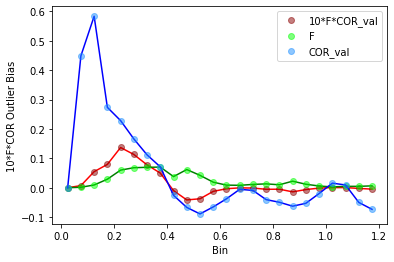

In [16]:
plt.plot(bin_fle.Bin,10*bin_fle.fout*bin_fle.COR_Outlier_Bias,c='red',)
plt.plot(bin_fle.Bin,10*bin_fle.fout*bin_fle.COR_Outlier_Bias,'o',c='darkred',alpha=0.5,label='10*F*COR_val')
plt.plot(bin_fle.Bin,bin_fle.fout,c='g')
plt.plot(bin_fle.Bin,bin_fle.fout,'o',alpha=0.5,label='F',c='lime')
plt.plot(bin_fle.Bin,bin_fle.COR_Outlier_Bias,c='blue')
plt.plot(bin_fle.Bin,bin_fle.COR_Outlier_Bias,'o',c='dodgerblue',alpha=0.5,label='COR_val')
plt.xlabel('Bin')
plt.ylabel('10*F*COR Outlier Bias')
plt.legend()